# Convolutional autoencoder

In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [29]:


input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [30]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 8)           584 

In [31]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [32]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [33]:
#from keras.callbacks import TensorBoard

#autoencoder.fit(x_train, x_train,
#                epochs=50,
#                batch_size=128,
#                shuffle=True,
#                validation_data=(x_test, x_test),
#                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50


2022-02-16 15:36:10.808335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2151

2022-02-16 15:36:23.829312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 14s 29ms/step - loss: 0.2151 - val_loss: 0.1394
Epoch 2/50
469/469 [==============================] - 13s 28ms/step - loss: 0.1297 - val_loss: 0.1216
Epoch 3/50
469/469 [==============================] - 13s 28ms/step - loss: 0.1180 - val_loss: 0.1140
Epoch 4/50
469/469 [==============================] - 13s 27ms/step - loss: 0.1126 - val_loss: 0.1096
Epoch 5/50
469/469 [==============================] - 13s 27ms/step - loss: 0.1094 - val_loss: 0.1074
Epoch 6/50
469/469 [==============================] - 13s 27ms/step - loss: 0.1073 - val_loss: 0.1053
Epoch 7/50
469/469 [==============================] - 13s 27ms/step - loss: 0.1056 - val_loss: 0.1041
Epoch 8/50
469/469 [==============================] - 12s 26ms/step - loss: 0.1044 - val_loss: 0.1027
Epoch 9/50
469/469 [==============================] - 12s 26ms/step - loss: 0.1033 - val_loss: 0.1023
Epoch 10/50
469/469 [==============================] - 12s 26ms/step - loss: 0.1024 - val_los

This allows us to monitor training in the TensorBoard web interface (by navighating to http://0.0.0.0:6006):

2022-02-16 16:10:44.289628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


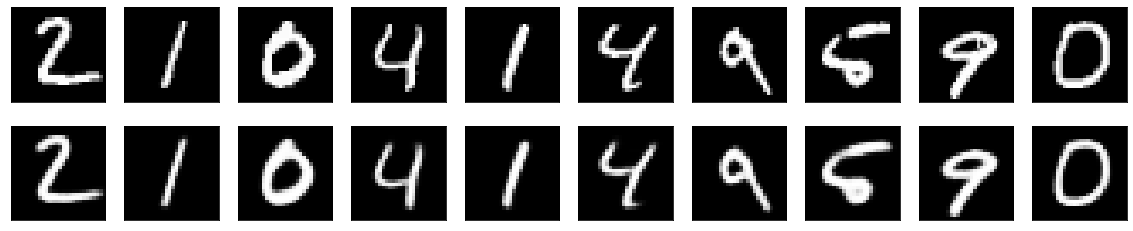

In [42]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

We can also have a look at the 128-dimensional encoded representations. These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images.

2022-02-16 15:46:48.661654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


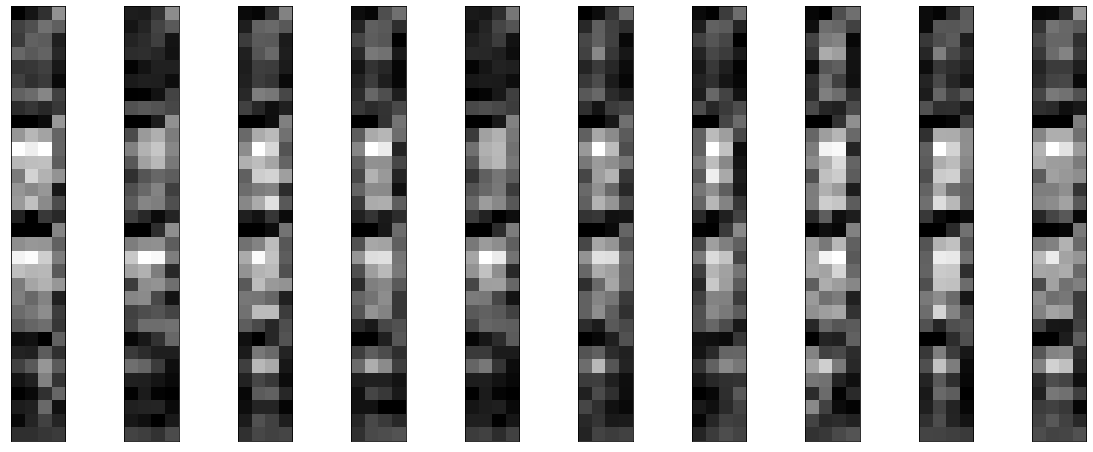

In [35]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Application to image denoising

In [43]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

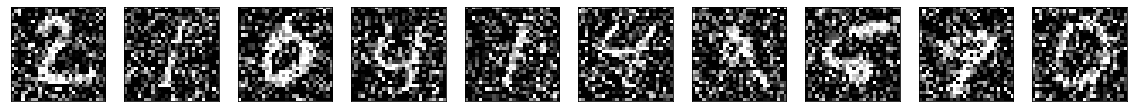

In [44]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

If you squint you can still recognize them, but barely. Can our autoencoder learn to recover the original digits? Let's find out.

Compared to the previous convolutional autoencoder, in order to improve the quality of the reconstructed, we'll use a slightly different model with more filters per layer:

In [45]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

In [39]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
                #callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)]
                )

Epoch 1/100


2022-02-16 15:46:50.915688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.1715

2022-02-16 15:47:01.761208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 12s 24ms/step - loss: 0.1715 - val_loss: 0.1198
Epoch 2/100
469/469 [==============================] - 11s 24ms/step - loss: 0.1162 - val_loss: 0.1113
Epoch 3/100
469/469 [==============================] - 11s 24ms/step - loss: 0.1101 - val_loss: 0.1064
Epoch 4/100
469/469 [==============================] - 11s 24ms/step - loss: 0.1063 - val_loss: 0.1043
Epoch 5/100
469/469 [==============================] - 11s 24ms/step - loss: 0.1041 - val_loss: 0.1027
Epoch 6/100
469/469 [==============================] - 13s 27ms/step - loss: 0.1026 - val_loss: 0.1011
Epoch 7/100
469/469 [==============================] - 14s 29ms/step - loss: 0.1014 - val_loss: 0.1004
Epoch 8/100
469/469 [==============================] - 14s 29ms/step - loss: 0.1005 - val_loss: 0.0991
Epoch 9/100
469/469 [==============================] - 14s 30ms/step - loss: 0.0997 - val_loss: 0.0991
Epoch 10/100
469/469 [==============================] - 14s 29ms/step - loss: 0.0991 

2022-02-16 16:10:41.448863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


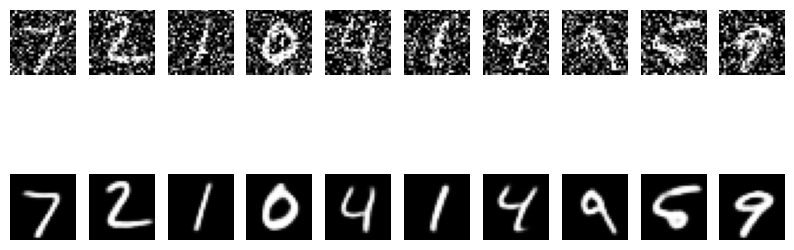

In [40]:
# take a look at the reconstructed digits
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    # display noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()


2022-02-16 16:10:54.329255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


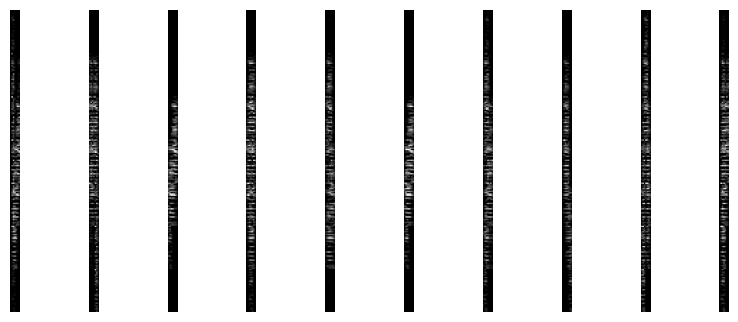

In [46]:
# take a look at the x-dimensional encoded representation
# these representations are 32x7x7, so we reshape them in order to be able to display them as grayscale images
from keras.models import Model
from keras import backend as K
import pickle

encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# save latent space features 1568-d vector
pickle.dump(encoded_imgs, open('denoise_autoe_features.pickle', 'wb'))

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(7, 7 * 32).T)
    plt.gray()
    ax.set_axis_off()

plt.show()

K.clear_session()